In [16]:
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [17]:
json_file_path = '../../dataset/train.json'

In [18]:
with open(json_file_path, 'r') as j :
    json_data = json.load(j)

In [19]:
print(json_data['categories'])

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'}, {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'}, {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'}, {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'}, {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'}, {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'}, {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'}, {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'}, {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'}, {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]


In [20]:
df_annotations = json_normalize(json_data['annotations'])
df_annotations

,image_id,category_id,area,bbox,iscrowd,id
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4
...,...,...,...,...,...,...
23139,4882,5,768591.81,"[0.0, 116.2, 944.1, 814.1]",0,23139
23140,4882,7,57309.72,"[302.1, 439.3, 265.2, 216.1]",0,23140
23141,4882,0,1772.74,"[511.3, 451.1, 58.7, 30.2]",0,23141
23142,4882,1,53008.67,"[255.0, 421.4, 271.7, 195.1]",0,23142


In [21]:
wh = np.array([np.array(i[2:]) for i in df_annotations['bbox']])
wh = pd.DataFrame(wh)
wh.columns = ['width', 'height']
df_annotations = pd.concat([df_annotations, wh], axis = 1)

aspect_ratio = [df_annotations['width'][i]/df_annotations['height'][i] for i in range(len(df_annotations))]
aspect_ratio = pd.DataFrame(aspect_ratio)
aspect_ratio.columns = ['aspect_ratio']
df_annotations = pd.concat([df_annotations, aspect_ratio], axis = 1)
df_annotations

,image_id,category_id,area,bbox,iscrowd,id,width,height,aspect_ratio
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,547.8,469.7,1.166276
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,57.6,180.6,0.318937
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,144.6,181.6,0.796256
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,274.3,251.9,1.088924
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,233.7,103.4,2.260155
...,...,...,...,...,...,...,...,...,...
23139,4882,5,768591.81,"[0.0, 116.2, 944.1, 814.1]",0,23139,944.1,814.1,1.159686
23140,4882,7,57309.72,"[302.1, 439.3, 265.2, 216.1]",0,23140,265.2,216.1,1.227210
23141,4882,0,1772.74,"[511.3, 451.1, 58.7, 30.2]",0,23141,58.7,30.2,1.943709
23142,4882,1,53008.67,"[255.0, 421.4, 271.7, 195.1]",0,23142,271.7,195.1,1.392619


<AxesSubplot:xlabel='width', ylabel='Count'>

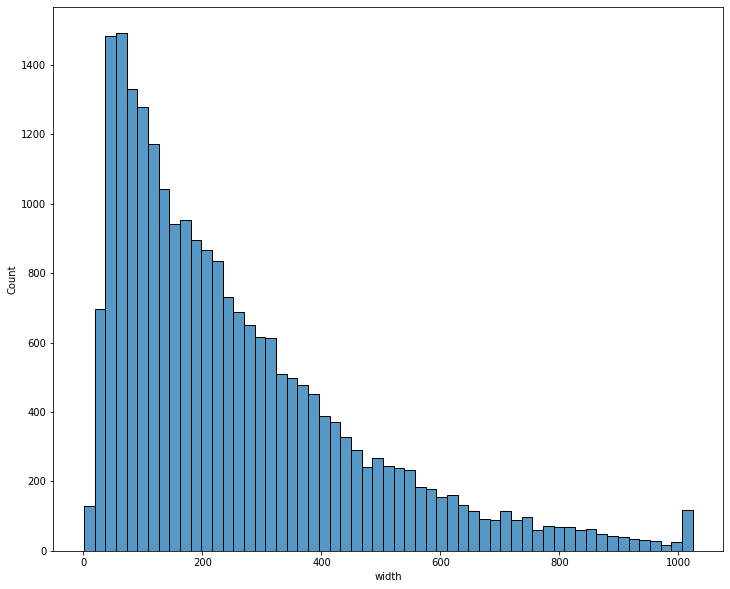

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='width', data=df_annotations)

<AxesSubplot:xlabel='height', ylabel='Count'>

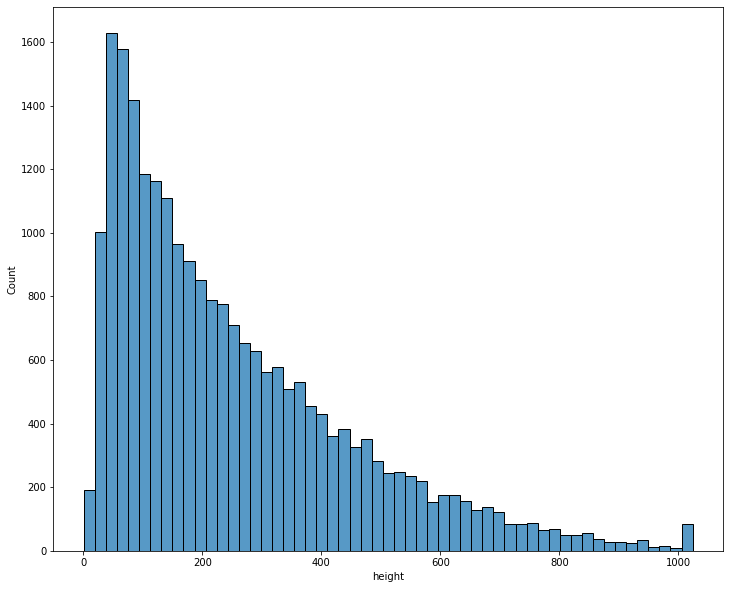

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='height', data=df_annotations)

<AxesSubplot:xlabel='aspect_ratio', ylabel='Count'>

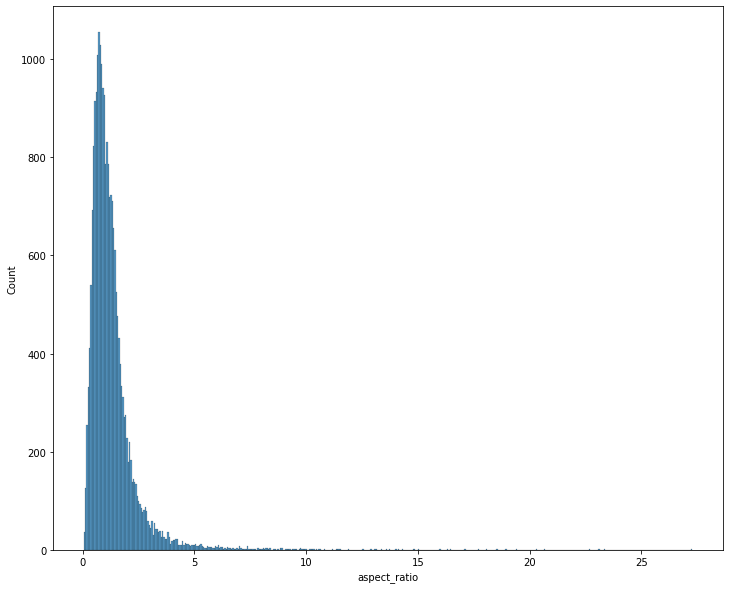

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='aspect_ratio', data=df_annotations)

In [63]:
width_max_index = df_annotations['width'].argmax()
width_max_id = df_annotations["image_id"][width_max_index]
width_min_index = df_annotations['width'].argmin()
width_min_id = df_annotations["image_id"][width_min_index]
df_annotations['width'].describe()

count    23144.000000
mean       257.499170
std        204.582362
min          0.700000
25%         99.750000
50%        200.900000
75%        357.650000
max       1023.900000
Name: width, dtype: float64

In [64]:
height_max_index = df_annotations['height'].argmax()
height_max_id = df_annotations["image_id"][height_max_index]
height_min_index = df_annotations['height'].argmin()
height_min_id = df_annotations["image_id"][height_min_index]
df_annotations['height'].describe()

count    23144.000000
mean       252.241518
std        200.143898
min          0.800000
25%         93.500000
50%        196.100000
75%        359.825000
max       1023.900000
Name: height, dtype: float64

In [65]:
ar_max_index = df_annotations['aspect_ratio'].argmax()
ar_max_id = df_annotations["image_id"][ar_max_index]
ar_min_index = df_annotations['aspect_ratio'].argmin()
ar_min_id = df_annotations["image_id"][ar_min_index]
df_annotations['aspect_ratio'].describe()

count    23144.000000
mean         1.298707
std          1.166790
min          0.055391
25%          0.691147
50%          1.047518
75%          1.537306
max         27.285714
Name: aspect_ratio, dtype: float64

In [54]:
import wandb
import random
import os

wandb.init(project="visualization", entity="winner")
wandb.run.name = 'outlier'

labels_file =  "../../dataset/train.json"
with open(labels_file) as f:
    labels = json.load(f)

categories = {c["id"]:c["name"] for c in labels["categories"]}
# Get 10 images to load
img_metadata = [
    (labels["images"][i]["id"], labels["images"][i]["file_name"]) 
    for i in [width_max_id, width_min_id, height_max_id, 
              height_min_id, ar_max_id, ar_min_id]
]

data_path = "../../dataset/"
imgs = []
for img_id, img_name in img_metadata:
    wandb_boxes = {"predictions": 
        {
            "box_data":[], 
            "class_labels": categories
        }
    }
    annots = [
        a for a in labels["annotations"] if a["image_id"]==img_id
    ]
    for annot in annots:
        tlx, tly, w, h = annot['bbox']
        cat = annot['category_id']
        curr_box = {}
        curr_box["position"] = {
            "minX": tlx, "maxX": tlx+w, 
            "minY": tly, "maxY": tly+h}
        curr_box["class_id"] = cat
        curr_box["box_caption"] = categories[cat]
        curr_box["domain"] = "pixel"
        curr_box["scores"] = { "score" : random.random() }
        wandb_boxes["predictions"]["box_data"].append(curr_box)

    img_path = os.path.join(data_path, img_name)
    img = wandb.Image(img_path, boxes=wandb_boxes)
    imgs.append(img)

wandb.log({"Example": imgs})
# Log onto the Weights & Biases website to view your images